# Analysis of the CIC IoT 2023 Dataset for Cybersecurity Research

[University of New Brunswick - Canadian Institute for Cybersecurity](https://www.unb.ca/cic/datasets/index.html)

# Introduction

This Jupyter Notebook aims to explore and analyze the CIC IoT 2023 dataset, developed by the Canadian Institute for Cybersecurity. The dataset is a  collection of network traffic data from various IoT devices under different cyberattack scenarios.

## Objectives

**Exploratory Data Analysis (EDA):** Conduct an initial exploration to uncover insights and patterns in the data.

## Dataset Overview

The CIC IoT 2023 dataset encompasses data from 105 IoT devices (Cameras, Power Outlets, Lamps) that aim to mimic a smart home environment, capturing their behavior under 33 distinct cyberattack scenarios. These attacks are categorized into seven main types: DDoS, DoS, Recon, Web-based, brute force, spoofing, and Mirai.

The packets are captured and stored in the format `.pcap` and total 548GB of data, but the authors also released the data consolidated by flow with relevant features already extracted into a serie of `.CSV` files.

Finally, the dataset was released as a 3.2GB zip file, containing a CSV partitioned in 169 parts that amounts to around 13GB.


### Columns Description
| Features | Description |
|---|---|
| `ts` | Timestamp |
| `flow duration` | Duration of the packet’s flow |
| `Header Length` | Header Length |
| `Protocol Type` | IP, UDP, TCP, IGMP, ICMP, Unknown (Integers) |
| `Duration` | Time-to-Live (ttl) |
| `Rate` | Rate of packet transmission in a flow |
| `Srate` | Rate of outbound packets transmission in a flow |
| `Drate` | Rate of inbound packets transmission in a flow |
| `fin flag number` | Fin flag value |
| `syn flag number` | Syn flag value |
| `rst flag number` | Rst flag value |
| `psh flag numbe` | Psh flag value |
| `ack flag number` | Ack flag value |
| `ece flag numbe` | Ece flag value |
| `cwr flag number` | Cwr flag value |
| `ack count` | Number of packets with ack flag set in the same flow |
| `syn count` | Number of packets with syn flag set in the same flow |
| `fin count` | Number of packets with fin flag set in the same flow |
| `urg coun` | Number of packets with urg flag set in the same flow |
| `rst count` | Number of packets with rst flag set in the same flow |
| `HTTP` | Indicates if the application layer protocol is HTTP |
| `HTTPS` | Indicates if the application layer protocol is HTTPS |
| `DNS` | Indicates if the application layer protocol is DNS |
| `Telnet` | Indicates if the application layer protocol is Telnet |
| `SMTP` | Indicates if the application layer protocol is SMTP |
| `SSH` | Indicates if the application layer protocol is SSH |
| `IRC` | Indicates if the application layer protocol is IRC |
| `TCP` | Indicates if the transport layer protocol is TCP |
| `UDP` | Indicates if the transport layer protocol is UDP |
| `DHCP` | Indicates if the application layer protocol is DHCP |
| `ARP` | Indicates if the link layer protocol is ARP |
| `ICMP` | Indicates if the network layer protocol is ICMP |
| `IPv` | Indicates if the network layer protocol is IP |
| `LLC` | Indicates if the link layer protocol is LLC |
| `Tot sum` | Summation of packets lengths in flow |
| `Min` | Minimum packet length in the flow |
| `Max` | Maximumpacket length in the flow |
| `AVG` | Average packet length in the flow |
| `Std` | Standard deviation of packet length in the flow |
| `Tot size` | Packet’s length |
| `IAT` | The time difference with the previous packet |
| `Number` | The number of packets in the flow |
| `Magnitude` | (Average of the lengths of incoming packets in the flow + average of the lengths of outgoing packets in the flow)$^{0.5}$ |
| `Radius` | (Variance of the lengths of incoming packets in the flow + variance of the lengths of outgoing packets in the flow)$^{0.5}$ |
| `Covariance` | Covariance of the lengths of incoming and outgoing packets |
| `Variance` | Variance of the lengths of incoming packets in the flow/variance of the lengths of outgoing packets in the flow |
| `Weight` | Number of incoming packets $\times$ Number of outgoing packets |

_Source: E. C. P. Neto, S. Dadkhah, R. Ferreira, A. Zohourian, R. Lu, A. A. Ghorbani. "CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment," Sensor (2023) – (submitted to Journal of Sensors)._

### Attack Types
| Attack Type                  | Category   | Description |
|------------------------------|------------|-------------|
| `DDoS-RSTFINFlood`           | DDoS       | A Distributed Denial of Service attack that floods a target with TCP RST and FIN packets to disrupt service. |
| `DDoS-PSHACK_Flood`          | DDoS       | Floods the target with TCP packets flagged PSH and ACK, overwhelming the target's processing capacity. |
| `DDoS-SYN_Flood`             | DDoS       | Inundates a target with SYN packets in an attempt to consume server resources to make the service unavailable. |
| `DDoS-UDP_Flood`             | DDoS       | Overwhelms random ports on a remote host with a large number of UDP packets, causing the host to respond with ICMP Destination Unreachable packets, thus saturating the network. |
| `DDoS-TCP_Flood`             | DDoS       | Similar to UDP flooding, but uses TCP packets to exhaust resources and bandwidth. |
| `DDoS-ICMP_Flood`            | DDoS       | An attack that overwhelms the target with ICMP Echo Request (ping) packets, leading to denial of service. |
| `DDoS-SynonymousIP_Flood`    | DDoS       | Utilizes multiple spoofed IP addresses that resolve to the same target, amplifying the attack. |
| `DDoS-ACK_Fragmentation`     | DDoS       | Floods the target with fragmented ACK packets, complicating reassembly and consuming resources. |
| `DDoS-UDP_Fragmentation`     | DDoS       | Similar to ACK fragmentation but uses UDP packets, causing disruption by fragmenting the attack payloads. |
| `DDoS-ICMP_Fragmentation`    | DDoS       | Uses fragmented ICMP packets to exploit vulnerabilities in packet reassembly processes, leading to denial of service. |
| `DDoS-SlowLoris`             | DDoS       | A subtle attack that holds connections open by sending partial requests and very slowly completing them, exhausting server resources. |
| `DDoS-HTTP_Flood`            | DDoS       | A volumetric attack that sends high volumes of HTTP requests to overwhelm the web server, leading to denial of service. |
| `DoS-UDP_Flood`              | DoS        | A Denial of Service attack using UDP packets to flood a target, similar to the DDoS version but often from a single source. |
| `DoS-SYN_Flood`              | DoS        | Sends a flood of TCP/SYN packets, typically from a single source, to exhaust server resources and prevent legitimate access. |
| `DoS-TCP_Flood`              | DoS        | A single-source attack that floods the target with TCP packets to deplete bandwidth or resources. |
| `DoS-HTTP_Flood`             | DoS        | A non-volumetric attack that sends a large number of HTTP requests from a single source to exhaust server resources. |
| `Mirai-greeth_flood`         | Mirai      | Part of the Mirai botnet's attack arsenal, this method floods the target with GRE Ethernet packets. |
| `Mirai-greip_flood`          | Mirai      | Utilizes the Mirai botnet to flood targets with GRE IP packets, exploiting vulnerabilities in GRE tunneling. |
| `Mirai-udpplain`             | Mirai      | A Mirai attack that sends plain UDP packets to disrupt service on the target system. |
| `Recon-PingSweep`            | Recon      | A reconnaissance technique that uses ICMP Echo requests to scan a range of IP addresses to find active hosts. |
| `Recon-OSScan`               | Recon      | Scans targeted systems to identify operating system versions, helping attackers tailor subsequent attacks. |
| `Recon-PortScan`             | Recon      | Scans ports on a target system to identify open ports and associated services, revealing potential attack vectors. |
| `VulnerabilityScan`          | Recon      | Automated scanning of systems to identify known vulnerabilities that can be exploited. |
| `Recon-HostDiscovery`        | Recon      | Techniques used to discover active hosts on a network for further exploitation or mapping. |
| `DNS_Spoofing`               | Spoofing   | The manipulation of DNS responses to redirect traffic to malicious sites or intercept data. |
| `MITM-ArpSpoofing`           | Spoofing   | A Man-In-The-Middle attack that uses ARP spoofing to intercept and modify traffic between two parties without their knowledge. |
| `BrowserHijacking`           | Web        | Manipulates a web browser's settings without the user's permission, often redirecting to malicious sites or displaying ads. |
| `Backdoor_Malware`           | Web        | Malware that creates a backdoor, allowing attackers to access and control a system remotely. |
| `XSS`                        | Web        | Cross-Site Scripting, a vulnerability that allows attackers to inject malicious scripts into benign web pages viewed by other users. |
| `Uploading_Attack`           | Web        | Exploits vulnerabilities in web applications to upload malicious files, leading to unauthorized access or data breaches. |
| `SqlInjection`               | Web        | Injects malicious SQL queries through web applications to manipulate or exploit databases. |
| `CommandInjection`           | Web        | Exploits vulnerabilities to execute arbitrary commands on the host through web applications. |
| `DictionaryBruteForce`       | BruteForce | A brute force attack that uses a dictionary of common passwords or phrases to gain unauthorized access. |
| `BenignTraffic`              | Benign     | Normal network traffic without any malicious intent, serving as a baseline for comparison. |

# Imports

In [1]:
import os
import sys
import math
import operator as op
from functools import reduce

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

sys.path.append('../')

## Definitions

In [2]:
from utils import get_constants, get_balanced_weights

constants = get_constants()

parquet_path = constants['parquet_path']

features = constants['features']
protocol_layer = constants['protocol_layer']
protocol_layer_map = constants['protocol_layer_map']
attack_category = constants['attack_category']
attack_category_map = constants['attack_category_map']

In [3]:
eng_formatter = mpl.ticker.EngFormatter(places=1, sep='')

def full_eng_formatter(value, total):
    return f"{eng_formatter(value)} ({value / total:.1%})"

def pct_not_zero(x):
    return x.ne(0).sum() / len(x)

In [4]:
general_attack_color = {
    category: mpl.colormaps['tab10'](i)
    for i, category in enumerate(sorted(attack_category))
}

attack_type_colors = {
    label: general_attack_color[attack_category_map[label]]
    for label in attack_category_map
}

network_layer_color = {
    layer: mpl.colormaps['Dark2'](i)
    for i, layer in enumerate(protocol_layer)
}

protocol_color = {
    protocol: network_layer_color[protocol_layer_map[protocol]]
    for protocol in features['protocol']
}

In [34]:
def plot_frequency_barh(column, feature, color_map=None):
    fig, ax = plt.subplots(figsize=(14, 5 + column.nunique() // 8))
    fig.suptitle(f'{feature} Frequency', fontsize=16)

    counts = column.value_counts(ascending=True)
    barh = counts.plot(
        kind='barh',
        width=0.8,
        ax=ax,
        color=tuple(map(color_map.get, counts.index)) if color_map else None
    )

    h_displacement = 0.005 * max(counts)
    y_displacement = -0.005 * len(counts)

    for index, value in enumerate(counts):
        plt.text(
            x=value + h_displacement,
            y=index + y_displacement,
            s=full_eng_formatter(value, sum(counts))
        )

    ax.set_xlabel('Frequency')
    ax.set_ylabel(feature)
    ax.set_xlim(right=1.12 * max(counts))
    ax.xaxis.set_major_formatter(eng_formatter)

    plt.tight_layout()


def plot_binary_features(df, size, title, color_map=None):
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.suptitle(title, fontsize=16)

    counts = df.sum(axis=0).sort_values(ascending=False)
    counts.plot.bar(
        ax=ax,
        legend=False,
        color=tuple(map(color_map.get, counts.index)) if color_map else None
    )

    ax.set_xlabel(None)
    plt.xticks(rotation=45, ha='right')
    ax.set_ylabel('Count')
    ax.set_ylim(top=1.05 * ax.get_ylim()[1])
    ax.yaxis.set_major_formatter(eng_formatter)

    for p in ax.patches:
        ax.annotate(
            full_eng_formatter(p.get_height(), size),
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='center',
            fontsize=8,
            xytext=(2, 8),
            textcoords='offset points'
        )
    
    plt.tight_layout()


def plot_box_attack_features(df, features, label_column, title, log_features={}, color_map=None):
    num_plots = len(features)
    ncols = 2
    nrows = math.ceil(num_plots / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
    fig.suptitle(title, fontsize=16)

    for ax, feature in zip(axes.flatten(), features):
        ax.set_title(f'{feature}')
        sns.boxplot(
            data=df,
            x=label_column,
            hue=label_column,
            y=feature,
            palette=color_map,
            ax=ax
        )

        if df[feature].max() > 100:
            ax.yaxis.set_major_formatter(eng_formatter)

        ax.set_xlabel(None)
        ax.set_ylabel(feature)

        if feature in log_features:
            ax.set_yscale('log')
            ax.set_ylabel(ax.get_ylabel() + ' (Log Scale)')

    # Remove empty subplots
    for ax in axes.flatten()[num_plots:nrows*ncols]:
        fig.delaxes(ax)

    plt.tight_layout(pad=1.8)

In [6]:
def print_percentage_styled(df):
    return df.style.background_gradient(
        vmin=0.0,
        vmax=1.0,
        cmap='Blues'
    ).format('{:.1%}')


def print_percentage_df(df, label, features):
    percentage_matrix = df.groupby(label, observed=False).agg({
        col: 'mean'
        for col in features
    })

    return print_percentage_styled(percentage_matrix)


def print_incidence_df(df, features):
    counts = pd.DataFrame([
        df.loc[df[feature_x], features].mean()
        for feature_x in features
    ], index=features, columns=features)

    return print_percentage_styled(counts)

# EDA

Let's start taking a first look at the data we have.

In [7]:
df = pd.read_parquet(parquet_path)

In [8]:
general_label_weights = get_balanced_weights(df, 'general_label')
label_weights = get_balanced_weights(df, 'label')

df_sample = df.sample(1_500_000, weights=general_label_weights, random_state=6958)

## Overview

In [9]:
display(HTML(f"""
<h4>
    There are <strong>{eng_formatter(len(df))}</strong> records,
    with <strong>{len(df.columns) - 2}</strong> features
    and <strong>2</strong> classification categories.
</h4>
"""))

In [10]:
df.sample(5).T

,31695836,32886186,10794098,22893249,13515028
flow_duration,0.03,0.36,0.00,0.10,0.00
Header_Length,17031.00,26752.00,54.00,86.40,54.00
Protocol Type,17.00,17.00,6.00,6.00,6.00
Duration,64.00,64.00,64.00,64.00,64.00
Rate,12943.85,3188.88,2.50,12.45,1.55
Srate,12943.85,3188.88,2.50,12.45,1.55
Drate,0.00,0.00,0.00,0.00,0.00
fin_flag_number,False,False,False,False,True
syn_flag_number,False,False,False,True,False
rst_flag_number,False,False,False,False,True


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
flow_duration,46686579.00,5.77,285.03,0.00,0.00,0.00,0.11,394357.22
Header_Length,46686579.00,76704.11,461331.72,0.00,54.00,54.00,280.55,9907148.00
Protocol Type,46686579.00,9.07,8.95,0.00,6.00,6.00,14.33,47.00
Duration,46686579.00,66.35,14.02,0.00,64.00,64.00,64.00,255.00
Rate,46686579.00,9064.03,99562.49,0.00,2.09,15.75,117.38,8388608.00
Srate,46686579.00,9064.03,99562.49,0.00,2.09,15.75,117.38,8388608.00
Drate,46686579.00,0.00,0.01,0.00,0.00,0.00,0.00,29.72
ack_count,46686579.00,0.09,0.29,0.00,0.00,0.00,0.00,7.70
syn_count,46686579.00,0.33,0.66,0.00,0.00,0.00,0.06,12.87
fin_count,46686579.00,0.10,0.33,0.00,0.00,0.00,0.00,248.32


## Attacks

In [12]:
HTML(f"""
<p>
    There are <strong>{df.label.nunique() - 1} + 1</strong> attack types
    from <strong>{df.general_label.nunique() - 1} + 1</strong> attack categories in this dataset.
</p>
""")

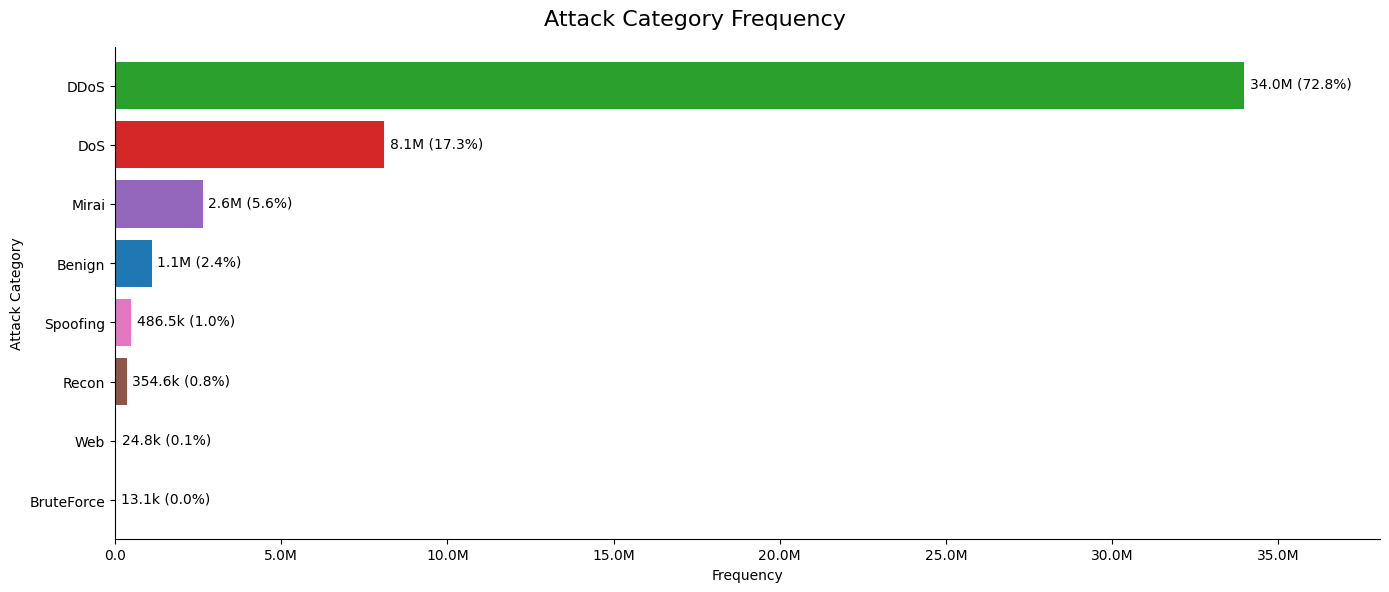

In [35]:
plot_frequency_barh(
    column=df.general_label,
    feature='Attack Category',
    color_map=general_attack_color
)

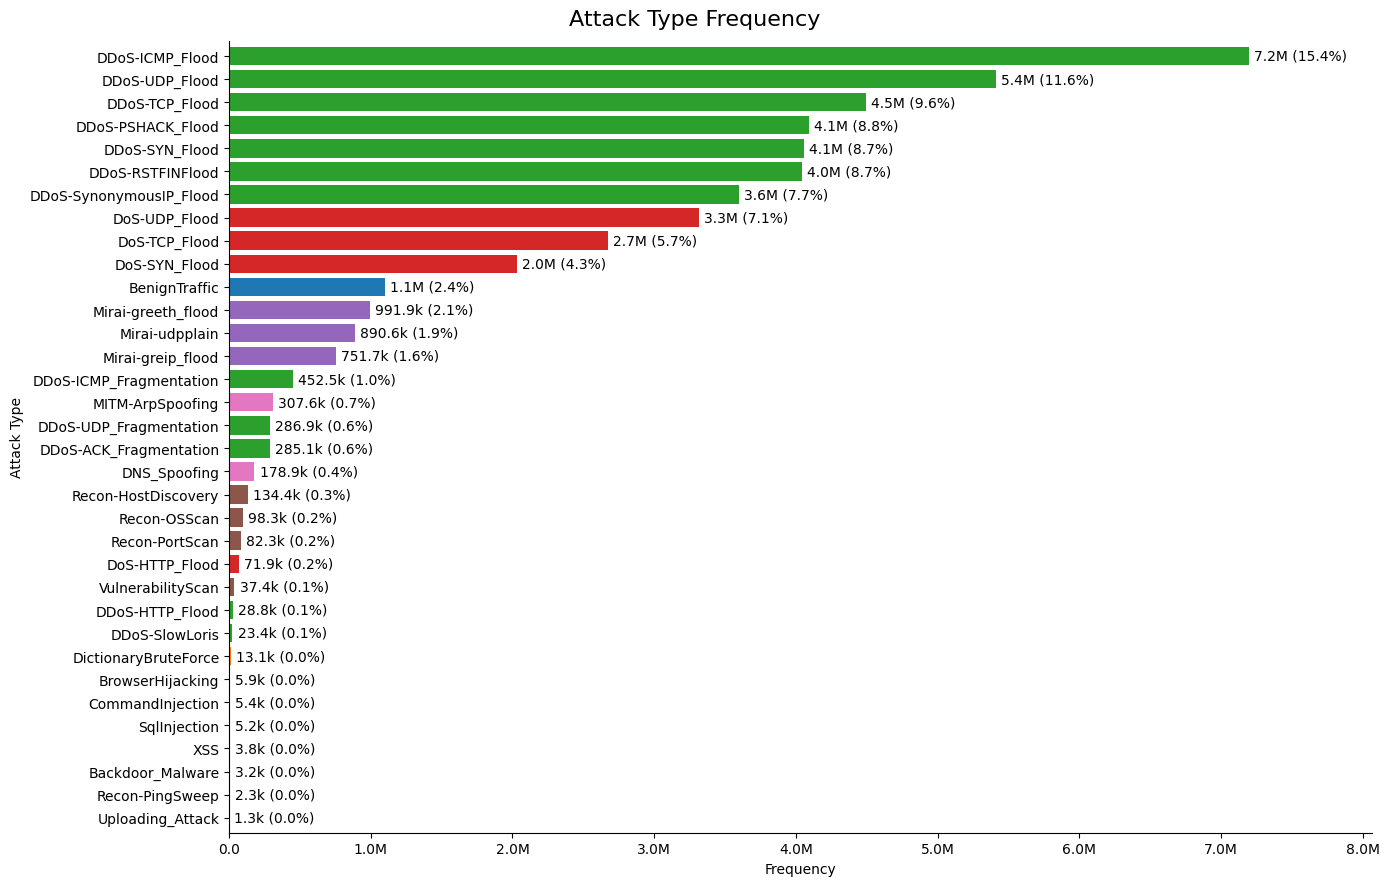

In [14]:
plot_frequency_barh(
    column=df.label,
    feature='Attack Type',
    color_map=attack_type_colors
)

## Protocols

In [15]:
HTML(f"""
<p>
    There are <strong>{len(features['protocol'])} protocols</strong> in this dataset divided among <strong>{len(protocol_layer)} network layers</strong>:
    <ol start=5 reversed>
    {
        ''.join(
            f"<li><strong>{layer}</strong>: {', '.join(protocols)}</li>"
            for layer, protocols in protocol_layer.items()
        )
    }
    </ol>
</p>
""")

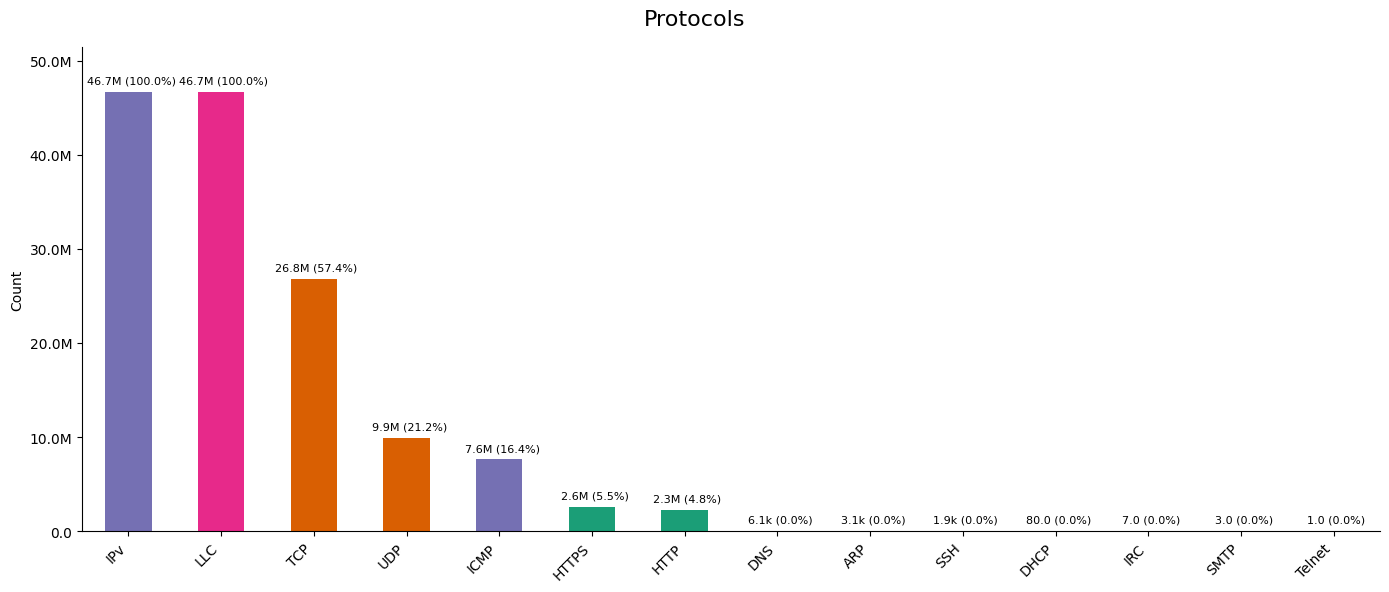

In [16]:
plot_binary_features(
    df=df[features['protocol']],
    size=len(df),
    title="Protocols",
    color_map=protocol_color
)

We notice that some protocols have too few examples, like `Telnet` (1), `SMTP` (3), `IRC` (7), and probably won't be used as features for our model. It's also important to notice that there are also protocols present in almost all records (`IPv`, `LLC`) and, since they wouldn't show much variance that a model could use to identify an attack here, we also need to look if these features should be dropped.

### Protocol x Protocol

We can also look at how protocols are related in the dataset to check the consistency to what is expeceted:

In [17]:
print_incidence_df(df, features['protocol'])

,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,DHCP,TCP,UDP,ICMP,IPv,ARP,LLC
HTTP,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
HTTPS,0.0%,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
DNS,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,100.0%,0.0%,100.0%
Telnet,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
SMTP,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
SSH,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
IRC,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
DHCP,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,100.0%,0.0%,100.0%,0.0%,100.0%
TCP,8.4%,9.6%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%
UDP,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,100.0%,0.0%,100.0%


### Protocols by Network Layer

Finally, we can understand that for Application, Transport and Link Layers, we have at most one of the protocols being used (for the Internet Layer it is possible that the ICMP and the IP are both present in the same flow). 

In [18]:
for layer, protocols in protocol_layer.items():
    inter_df = df.loc[:, protocols].sum(axis=1)
    and_count = (inter_df >= 2).sum()
    or_count = (inter_df >= 1).sum()

    print(f"{layer}: {full_eng_formatter(or_count, len(df))} have at least 1 protocol, "
          f"and {full_eng_formatter(and_count, len(df))} have 2 or more protocols")

Application Layer: 4.8M (10.4%) have at least 1 protocol, and 0.0 (0.0%) have 2 or more protocols
Transport Layer: 36.7M (78.6%) have at least 1 protocol, and 0.0 (0.0%) have 2 or more protocols
Internet Layer: 46.7M (100.0%) have at least 1 protocol, and 7.6M (16.4%) have 2 or more protocols
Link Layer: 46.7M (100.0%) have at least 1 protocol, and 0.0 (0.0%) have 2 or more protocols


### Protocol vs Attack Category

Here we can take a look at what percentage of each attack had each of the protocols present.

In [19]:
print_percentage_df(df, 'general_label', features['protocol'])

,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,DHCP,TCP,UDP,ICMP,IPv,ARP,LLC
general_label,,,,,,,,,,,,,,
Benign,3.9%,70.8%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,86.0%,6.8%,0.0%,99.9%,0.0%,99.9%
BruteForce,0.8%,32.4%,0.1%,0.0%,0.0%,14.6%,0.0%,0.0%,73.6%,11.7%,0.0%,99.7%,0.1%,99.7%
DDoS,5.2%,3.3%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,60.1%,16.0%,22.5%,100.0%,0.0%,100.0%
DoS,4.8%,4.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,59.0%,40.9%,0.1%,100.0%,0.0%,100.0%
Mirai,0.1%,0.2%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.4%,33.8%,0.0%,100.0%,0.0%,100.0%
Recon,1.6%,23.5%,0.3%,0.0%,0.0%,0.0%,0.0%,0.0%,82.0%,7.4%,0.0%,99.5%,0.3%,99.5%
Spoofing,6.4%,52.1%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,64.8%,28.3%,0.0%,99.6%,0.2%,99.6%
Web,9.4%,29.3%,0.6%,0.0%,0.0%,0.0%,0.0%,0.0%,63.3%,16.3%,0.0%,99.7%,0.1%,99.7%


### Protocol vs Attack Type

In [20]:
print_percentage_df(df, 'label', features['protocol'])

,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,DHCP,TCP,UDP,ICMP,IPv,ARP,LLC
label,,,,,,,,,,,,,,
Backdoor_Malware,5.0%,32.3%,0.5%,0.0%,0.0%,0.0%,0.0%,0.0%,57.2%,20.0%,0.0%,99.8%,0.1%,99.8%
BenignTraffic,3.9%,70.8%,0.2%,0.0%,0.0%,0.0%,0.0%,0.0%,86.0%,6.8%,0.0%,99.9%,0.0%,99.9%
BrowserHijacking,1.7%,37.0%,0.6%,0.0%,0.0%,0.0%,0.0%,0.0%,75.1%,11.5%,0.0%,99.5%,0.1%,99.5%
CommandInjection,23.9%,25.1%,0.6%,0.0%,0.0%,0.0%,0.0%,0.0%,63.7%,14.5%,0.0%,99.8%,0.0%,99.8%
DDoS-ACK_Fragmentation,3.7%,2.5%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,26.5%,0.3%,0.0%,100.0%,0.0%,100.0%
DDoS-HTTP_Flood,82.8%,1.2%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,99.5%,0.3%,0.0%,100.0%,0.0%,100.0%
DDoS-ICMP_Flood,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,99.9%,100.0%,0.0%,100.0%
DDoS-ICMP_Fragmentation,0.0%,0.9%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,1.4%,0.4%,97.5%,99.9%,0.1%,99.9%
DDoS-PSHACK_Flood,7.2%,5.2%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,100.0%,0.0%,100.0%


## Flags

First, let's take a look at the boolean features related to the TCP flags.

In [21]:
HTML(f"""
<p>
    The dataset presents <strong>{len(features['tcp_flag'])}</strong> flags.
</p>
""")

It's importante to notice that the flags are all related to the operation of the TCP protocol, so we won't find any flag set to `True` when the flow isn't based on the TCP protocol. 

In [22]:
HTML(f"""
<p>
    There are <strong>{df[~df.TCP][features['tcp_flag']].any(axis=1).sum()}</strong> flags not related to the TCP protocol
    and <strong>{full_eng_formatter(df[df.TCP][features['tcp_flag']].any(axis=1).sum(), len(df[df.TCP]))}</strong> of the TCP records have at least one flag.
</p>
""")

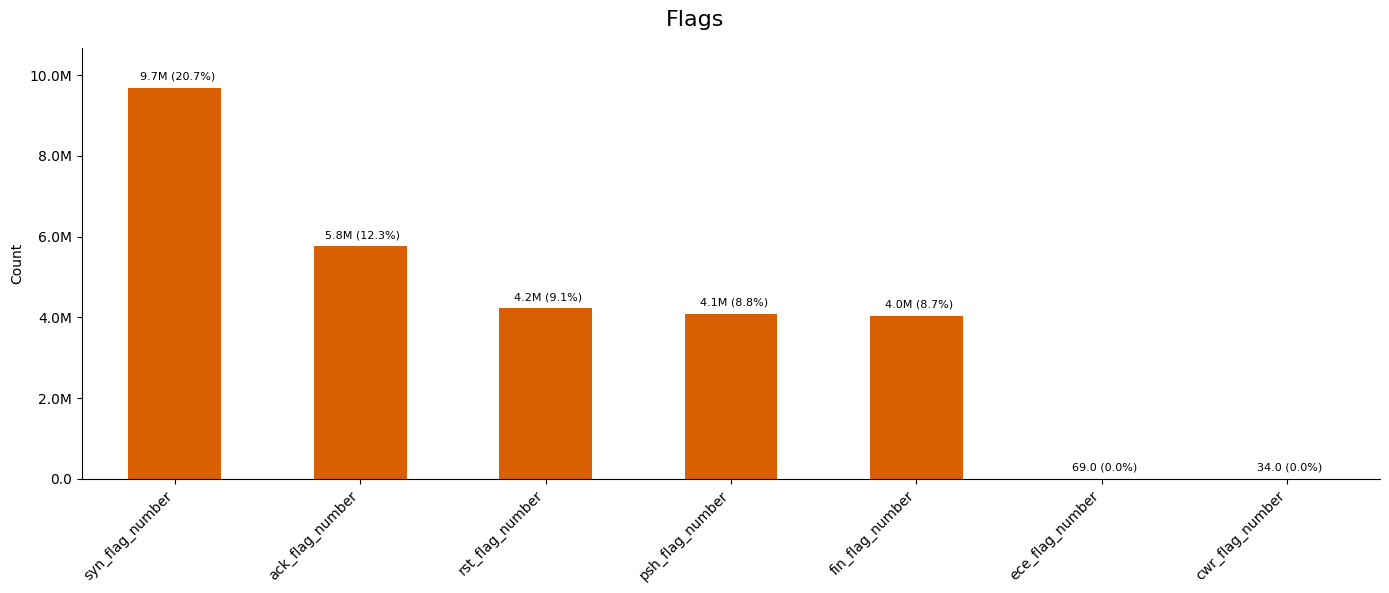

In [23]:
plot_binary_features(
    df=df[features['tcp_flag']],
    size=len(df),
    title="Flags",
    color_map={flag: protocol_color['TCP'] for flag in features['tcp_flag']}
)

Here again we see a couple features that doesn't show up frequently in the dataset: `ece_flag_number` (69) and `cwr_flag_number` (34).

### Flags vs Attack Category

In [24]:
print_percentage_df(df, 'general_label', features['tcp_flag'])

,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number
general_label,,,,,,,
Benign,0.0%,0.0%,0.0%,1.8%,84.8%,0.0%,0.0%
BruteForce,0.2%,0.2%,0.0%,8.0%,70.6%,0.0%,0.0%
DDoS,11.9%,22.5%,12.1%,11.8%,12.2%,0.0%,0.0%
DoS,0.0%,24.5%,0.8%,0.0%,1.6%,0.0%,0.0%
Mirai,0.0%,0.0%,0.0%,0.0%,0.4%,0.0%,0.0%
Recon,0.1%,15.6%,10.3%,1.9%,56.1%,0.0%,0.0%
Spoofing,0.0%,0.1%,0.0%,8.4%,63.8%,0.0%,0.0%
Web,0.0%,0.0%,0.0%,3.8%,60.1%,0.0%,0.0%


### Flags vs Attack Type

In [25]:
print_percentage_df(df, 'label', features['tcp_flag'])

,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number
label,,,,,,,
Backdoor_Malware,0.0%,0.0%,0.0%,3.1%,54.8%,0.0%,0.0%
BenignTraffic,0.0%,0.0%,0.0%,1.8%,84.8%,0.0%,0.0%
BrowserHijacking,0.0%,0.0%,0.0%,8.7%,72.7%,0.0%,0.0%
CommandInjection,0.0%,0.0%,0.0%,2.0%,61.9%,0.0%,0.0%
DDoS-ACK_Fragmentation,0.0%,0.0%,1.2%,0.0%,10.7%,0.0%,0.0%
DDoS-HTTP_Flood,0.7%,16.1%,6.8%,0.3%,87.0%,0.0%,0.0%
DDoS-ICMP_Flood,0.0%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%
DDoS-ICMP_Fragmentation,0.0%,0.0%,0.0%,0.0%,1.3%,0.0%,0.0%
DDoS-PSHACK_Flood,0.0%,0.0%,1.6%,98.2%,98.3%,0.0%,0.0%


### Flag Count

The dataset also brings the flag counts as a numeric value:

CPU times: user 19.8 s, sys: 1.04 s, total: 20.8 s
Wall time: 20.4 s


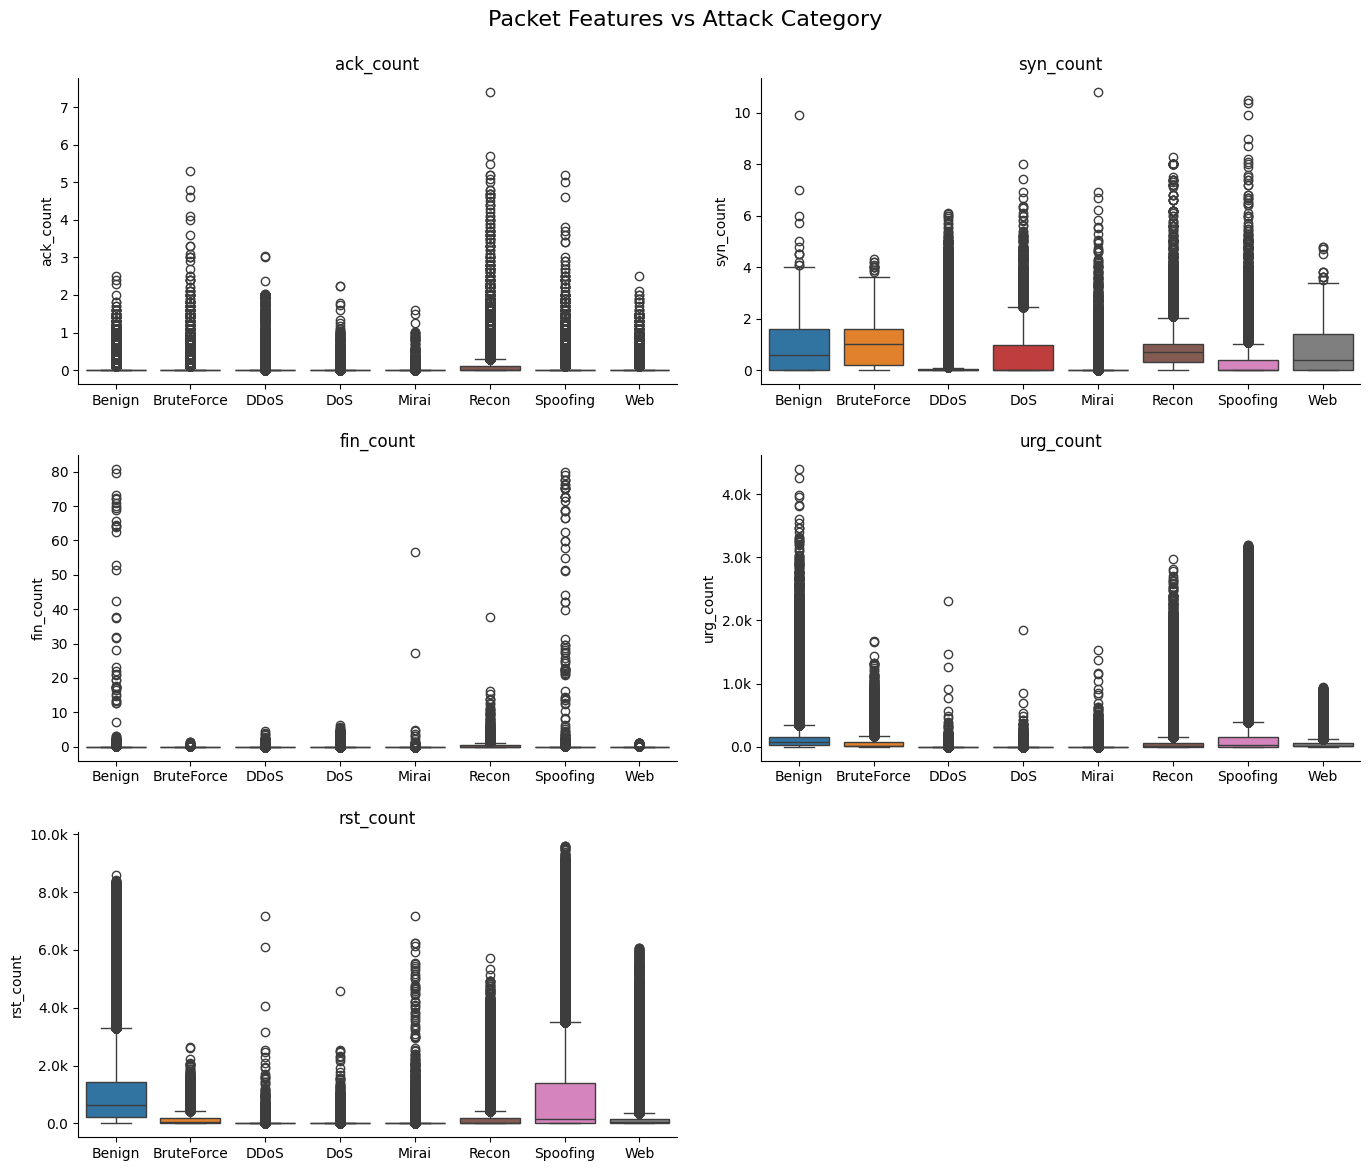

In [26]:
%%time

plot_box_attack_features(
    df_sample,
    features=features['tcp_flag_counts'], 
    label_column='general_label',
    title="Packet Features vs Attack Category",
    color_map=general_attack_color
)

It's interesting to notice that the flag counts are not totally correlated to the flags themselves, and that's something we still need to understand better.

Also notice that the flag `urg` is present in the counts, but not in the booleans.

In [27]:
common_flags = [
    flag.split('_')[0]
    for flag in features['tcp_flag_counts']
    if f"{flag.split('_')[0]}_flag_number" in features['tcp_flag']
]

def flag_count_summary(df, flag):
    return df.groupby(f'{flag}_flag_number').agg({
        f'{flag}_count': [pct_not_zero, 'min', 'mean', 'max']
    }).sort_index().rename_axis('is_flag_set')

pd.concat(
    (
        flag_count_summary(df, flag)
        for flag in common_flags
    ),
    axis=1
).stack(future_stack=True, level=0).style.format({
    'pct_not_zero': '{:.1%}',
    'min': '{:.2f}',
    'mean': '{:.2f}',
    'max': '{:.2f}',
})

Another problem seen is that there are records where the `{flag}_counts` is different from 0 even when the TCP protocol is not being used. This fact also requires a better understanding.

In [28]:
df.groupby('TCP').agg({
    flag: [pct_not_zero, 'max']
    for flag in features['tcp_flag_counts']
}).stack(future_stack=True, level=0).style.format({
    'pct_not_zero': '{:.1%}',
    'min': '{:.2f}',
    'mean': '{:.2f}',
    'max': '{:.2f}',
})

## Numeric Features

We are grouping the numeric features in 2 feature sets:
- Flow Rate Features
- Packet Features

### Flow Features

CPU times: user 29.2 s, sys: 1.09 s, total: 30.3 s
Wall time: 29.9 s


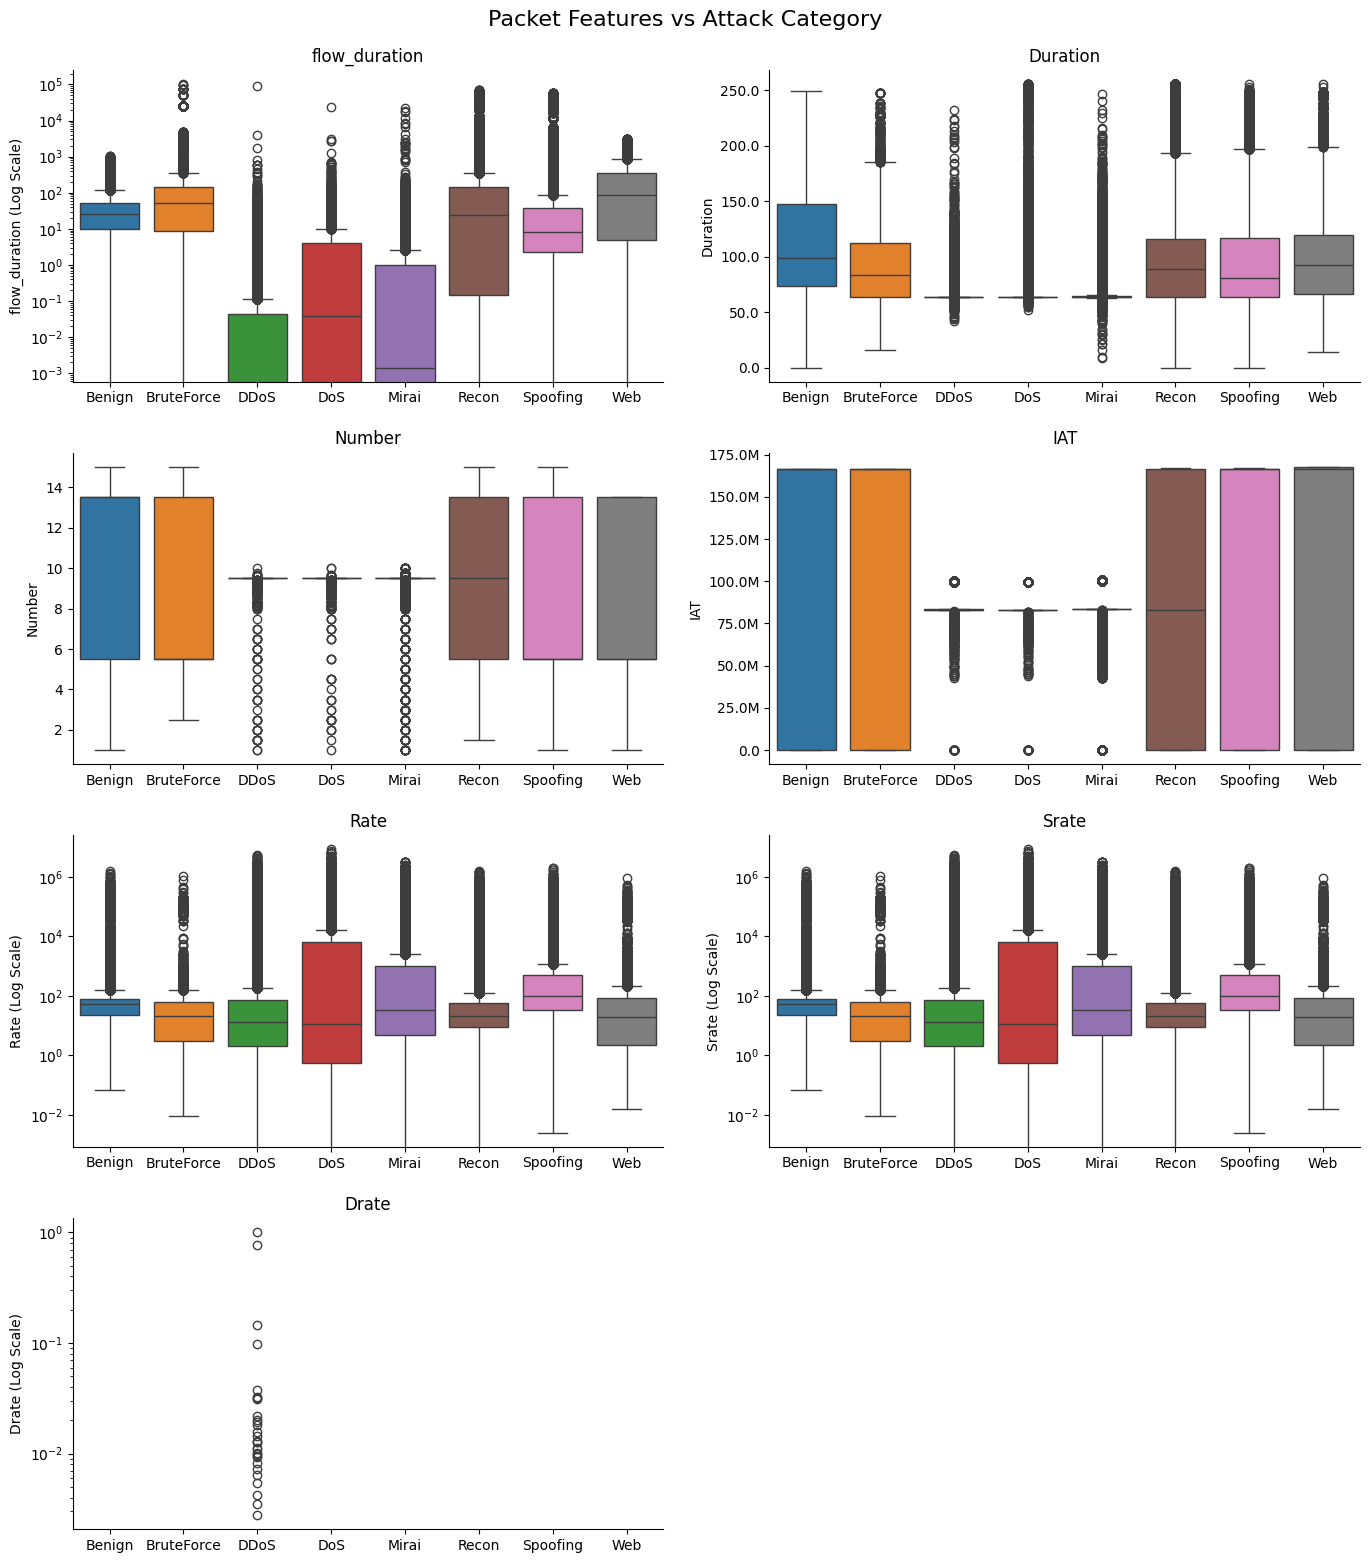

In [29]:
%%time

plot_box_attack_features(
    df_sample,
    features=features['flow'],
    label_column='general_label',
    title="Packet Features vs Attack Category",
    log_features={'flow_duration', 'Rate', 'Srate', 'Drate'},
    color_map=general_attack_color
)

### Packet Features

CPU times: user 54.4 s, sys: 2.16 s, total: 56.6 s
Wall time: 56.1 s


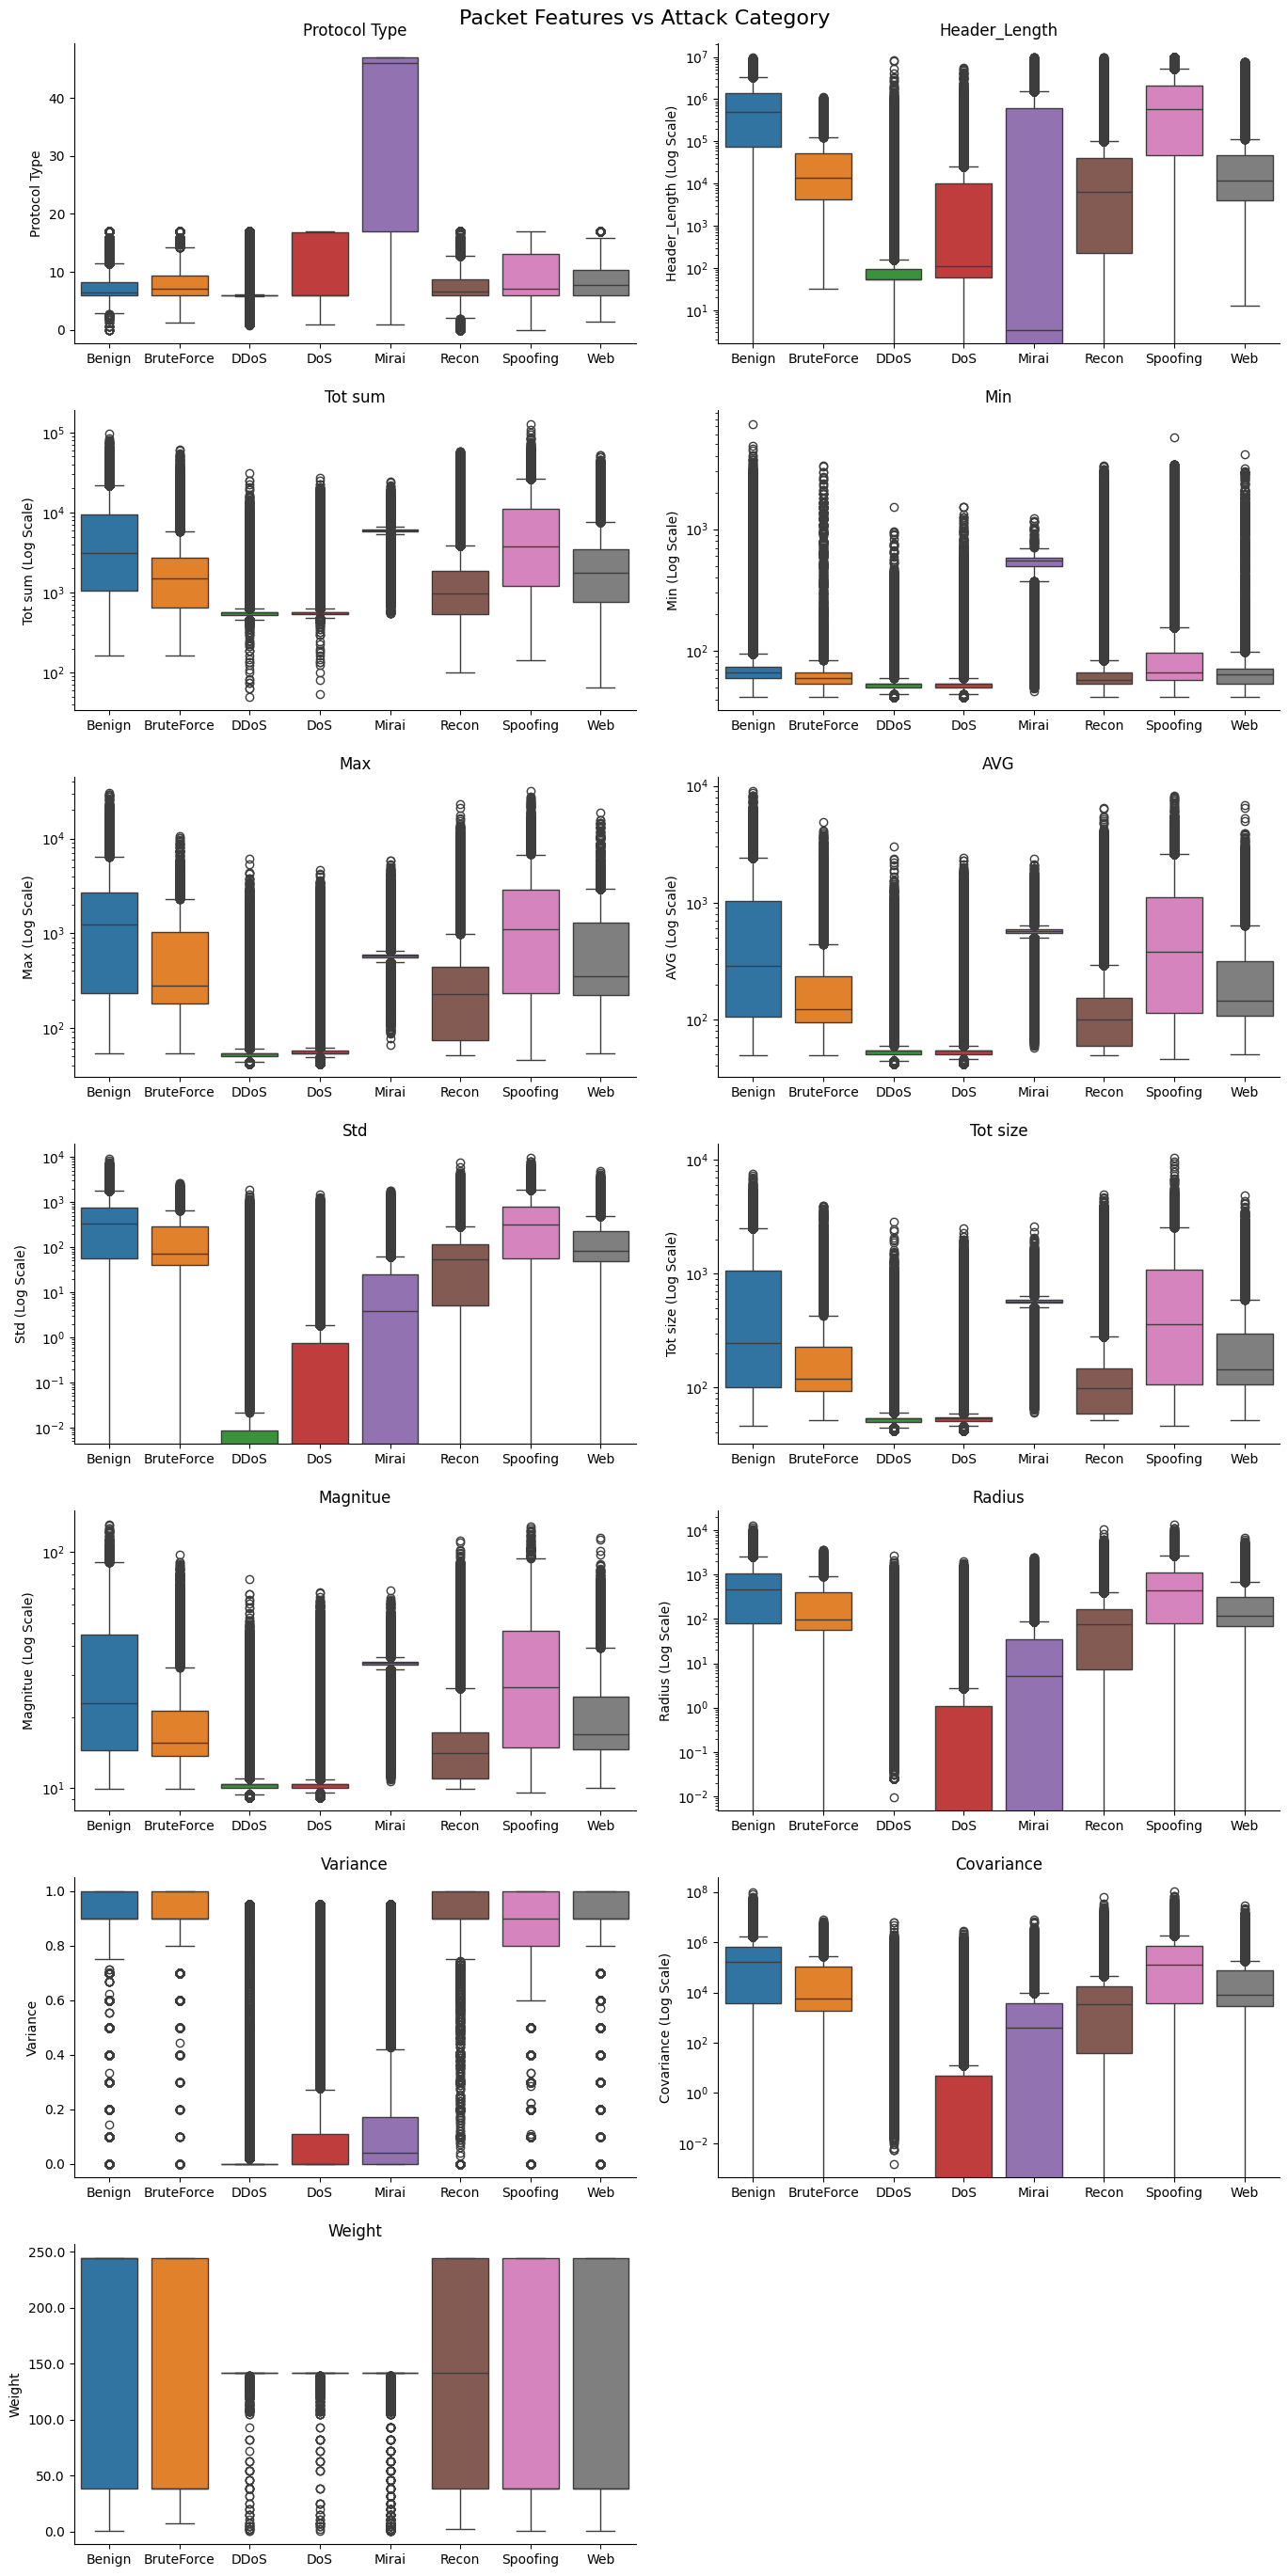

In [30]:
%%time

plot_box_attack_features(
    df_sample,
    features=features['packet'], 
    label_column='general_label',
    title="Packet Features vs Attack Category",
    log_features={'Header_Length', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Magnitue', 'Radius', 'Covariance'},
    color_map=general_attack_color
)

# Weighted Sample

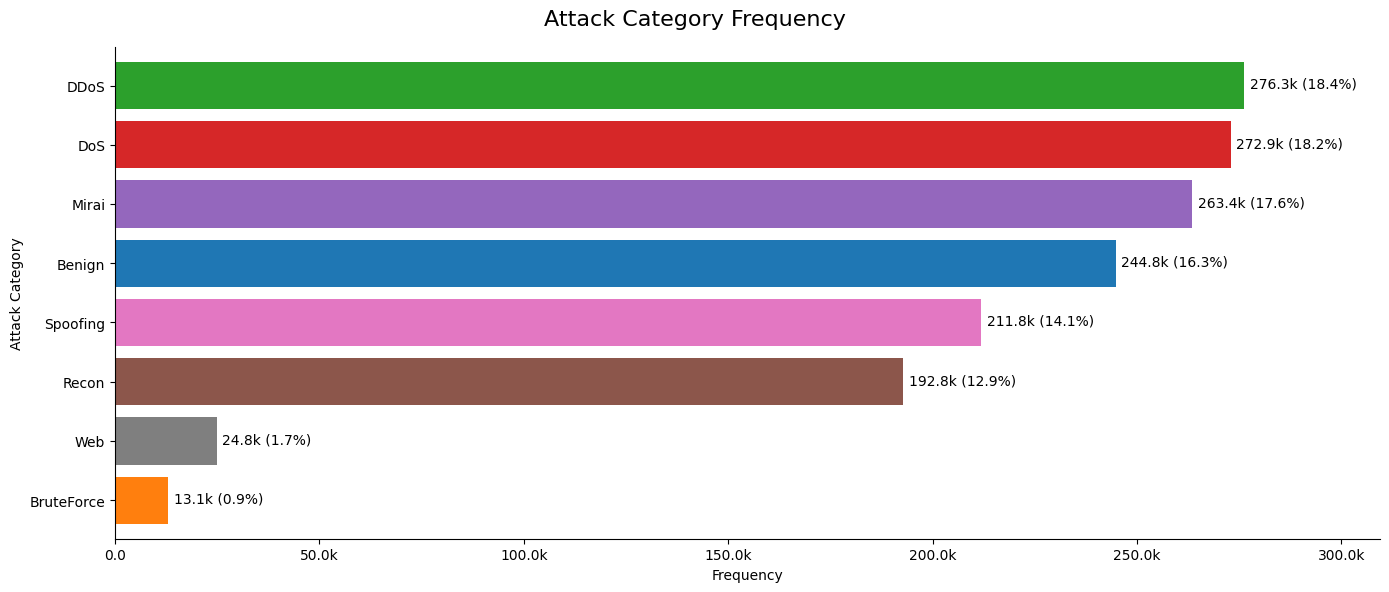

In [36]:
plot_frequency_barh(
    column=df_sample.general_label,
    feature='Attack Category',
    color_map=general_attack_color
)